# 1.0 Comparing Frequency Distributions

In [1]:
# Uploading files from your local file system

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving wnba.csv to wnba.csv
User uploaded file "wnba.csv" with length 20793 bytes


## 1.1 Comparing Frequency Distributions

In the previous mission, we learned **what graphs we can use to visualize the frequency distribution of any kind of variable**. In this mission, we'll learn about the graphs we can use to **compare** multiple frequency distributions at once.

We'll continue to work with the WNBA data set. Below are the first five rows to help you recollect its structure:

| _ | Name            | Team | Pos | Height | Weight | BMI       | Birth_Place | Birthdate         | Exp_ordinal       |
|---|-----------------|------|-----|--------|--------|-----------|-------------|-------------------|-------------------|
| 0 | Aerial Powers   | DAL  | F   | 183    | 71.0   | 21.200991 | US          | January 17, 1994  | Little experience |
| 1 | Alana Beard     | LA   | G/F | 185    | 73.0   | 21.329438 | US          | May 14, 1982      | Veteran           |
| 2 | Alex Bentley    | CON  | G   | 170    | 69.0   | 23.875433 | US          | October 27, 1990  | Experienced       |
| 3 | Alex Montgomery | SAN  | G/F | 185    | 84.0   | 24.543462 | US          | December 11, 1988 | Very experienced  |
| 4 | Alexis Jones    | MIN  | G   | 175    | 78.0   | 25.469388 | US          | August 5, 1994    | Rookie            |


Notice in the table above that we've kept the **Exp_ordinal** variable we created in the previous mission. To remind you, this variable is measured on an **ordinal scale** and describes the level of experience of a player according to the following labeling convention:


| Years in WNBA | Label             |
|---------------|-------------------|
| 0             | Rookie            |
| 1-3           | Little experience |
| 4-5           | Experienced       |
| 5-10          | Very experienced  |
| >10           | Veteran           |



In [9]:
import pandas as pd

# read the dataset
wnba = pd.read_csv("wnba.csv")

# cleaning the experience column
wnba.loc[wnba.Experience == 'R',"Experience"] = 0
wnba["Experience"] = wnba["Experience"].astype(int)

# create exp_ordinal column
wnba["Exp_ordinal"] = pd.cut(wnba.Experience,
       bins=[-1,0,3,5,10,100],
       labels=["Rookie","Little experience","Experienced",
              "Very experienced","Veteran"])

# verify the results
wnba.Exp_ordinal.value_counts()

Little experience    42
Very experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64


Let's say we're interested in analyzing how the distribution of the **Pos** variable (**player position**) varies with the level of experience. In other words, we want to determine, for instance, what are the positions on the court that rookies play most as, and how do rookies compare to veterans with respect to positions on the field.

Here's a series of steps we can take to achieve that:

- Segment the players in the data set by level of experience.
- For each segment, generate a frequency distribution table for the **Pos** variable.
- Analyze the frequency distributions comparatively.

In the cell below, we've already done the first step for you and segmented the players in the data set by level of experience. The next two steps are left for you as an exercise.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- For each segment, generate a frequency distribution table for the **Pos** variable.
  - For the **rookie** segment, assign the frequency distribution table to a variable named **rookie_distro**. tip: use df.value_counts() function.
  - For the **Little experience** segment, assign the table to **little_xp_distro.**
  - For the **Experienced** segment, assign the table to **experienced_distro.**
  - For the **Very experienced** segment, assign the table to **very_xp_distro**.
  - For the **Veteran** segment, assign the table to **veteran_distro.**
- Print all the tables and analyze them comparatively to determine whether there are any clear patterns in the distribution of player position depending on the level of experience.

In [3]:
rookies = wnba[wnba['Exp_ordinal'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']

# put your code here
rookie_distro = rookies['Pos'].value_counts()
little_xp_distro =little_xp['Pos'].value_counts()
experienced_distro = experienced['Pos'].value_counts()
very_xp_distro =very_xp['Pos'].value_counts()
veteran_distro = veterans['Pos'].value_counts()

print(rookie_distro,little_xp_distro,experienced_distro,very_xp_distro,veteran_distro)


G      14
C       4
F       4
F/C     1
Name: Pos, dtype: int64 G      14
F      13
C       8
F/C     4
G/F     3
Name: Pos, dtype: int64 G      9
C      6
F      6
F/C    2
G/F    2
Name: Pos, dtype: int64 G      16
C       6
F       6
G/F     5
F/C     4
Name: Pos, dtype: int64 G      7
F      4
G/F    3
F/C    1
C      1
Name: Pos, dtype: int64



## 1.2 Grouped Bar Plots

The purpose of the previous exercise was to give us a sense about how cumbersome really is to compare multiple distributions at once using frequency tables. Fortunately, we can make the comparison much quicker and more efficiently using graphs.

All the five frequency tables we wanted to compare were for the **Pos** variable, which is measured on a nominal scale. Remember that one kind of graph we can use to visualize the distribution of a nominal variable is a bar plot. A simple solution to our problem is to generate a bar plot for each table, and then group all the bar plots on a single figure.

This is where we'd like to arrive:

<img width="600" src="https://drive.google.com/uc?export=view&id=1xO1mMfvHCMhgglqAI0FrCBE-sE9gt9PZ">


Because we grouped all the bar plots together, the graph above is called a **grouped bar plot**. We can generate a grouped bar plot just like the one above using the [seaborn.countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html) function from the seaborn module, which you might already be familiar with from our visualization lessons. In the code snippet below, we will:

- Import the **seaborn** module with the alias **sns**.
- Generate the plot with **sns.countplot()**. We'll use the following parameters for this function:
  - **x** — specifies as a string the name of the column we want on the x-axis. We'll place the **Exp_ordinal** column on the x-axis.
  - **hue** — specifies as a string the name of the column we want the bar plots generated for. We want to generate the bar plots for the **Pos** column.
  - **data** - specifies the name of the variable which stores the data set. We stored the data in a variable named **wnba**.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


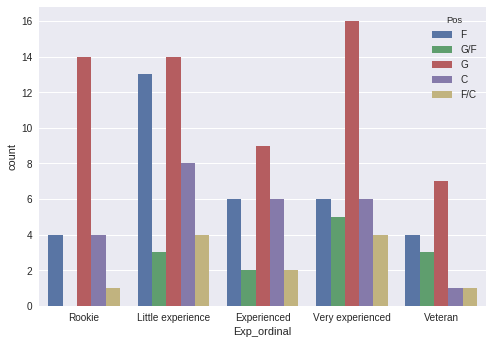

In [0]:
import seaborn as sns
sns.countplot(x = 'Exp_ordinal', hue = 'Pos', data = wnba)

Comparing the **five distributions** is now easier, and we can make a couple of observations:

- There's only one **rookie** playing on a combined position **(F/C)**. This is significantly less compared to more experienced players, which suggests that combined positions (**F/C** and **G/F**) may require more complex skills on the field that rookies rarely have.
- Rookies are the only category where we don't find players on all positions. We can see there are no rookies who play on a G/F position.
- Guards predominate for every level of experience. This probably means that most players in a basketball team are guards. It's worth examining the distributions of a couple of teams to find whether this is true. If it's true, it might be interesting to find out why teams need so many guards.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Usng **sns.countplot()**, generate a grouped bar plot similar to the one above.

  - Place the **Exp_ordinal** variable on the x-axis.
  - Generate the bar plots for the **Pos** variable. The data set is stored in **wnba** variable.
  - Using the **order** parameter of **sns.countplot()**, order the values on the x-axis in **descending** order. The **order** parameter takes in a list of strings, so you should use **order = ['Veteran', 'Very experienced', ..........]**.
  - Using the **hue_order** parameter, order the bars of each bar plot in ascending alphabetic order. **hue_order** takes in a list of strings, so you can use **hue_order = ['C', 'F', ......].**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


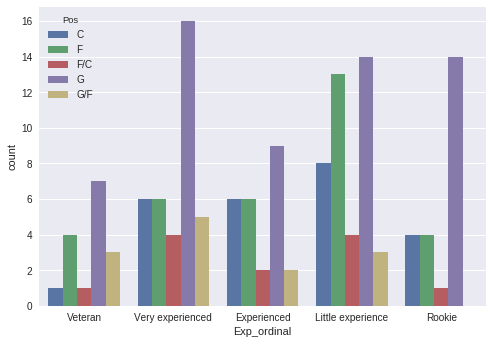

In [6]:
# put your code here
import seaborn as sns
sns.countplot(x = 'Exp_ordinal', hue = 'Pos', data = wnba, order = ['Veteran','Very experienced','Experienced','Little experience','Rookie'], hue_order = ['C','F','F/C','G','G/F'])

## 1.3 Challenge: Do Older Players Play Less?


When players get past a certain age, they become less and less physically fit as they get older. Intuitively, the fitness level of a player should directly affect how much she plays in a season. On average, a WNBA player played approximately 497 minutes in the 2016-2017 season:


In [0]:
wnba['MIN'].mean()

496.97202797202794

Let's hypothesize that older players generally play less than this average of 497 minutes, while younger players generally play more. As a benchmark to distinguish between younger and older players, we'll take the mean age of players in our sample, which is approximately 27:

In [0]:
wnba['Age'].mean()

27.076923076923077

To test our hypothesis, we can generate a grouped bar plot to examine the frequency distribution of younger and older players that played under the average or as much as the average or above. Our hypothesis predicts that we should see a grouped bar plot that looks similar to this:

<img width="600" src="https://drive.google.com/uc?export=view&id=11S_m6RQAGChN_iOy7mS1qoEjCOWSEBDV">


To generate a graph like the one above, we'll first need to create two new variables:

- An ordinal variable which labels each player as "young" or "old". If the player is 27 or over, we'll label her "old", otherwise the label is "young".
- An ordinal variable which describes whether the minutes played is below or above average (or equal to the average). If a player played 497 minutes or more, we'll assign her the label "average or above", otherwise we'll assign "below average".

In the code below, we'll use **lambda** functions to describe quickly the labeling logic above and **Series.apply()** to apply the **lambda** functions on the **Age** and **MIN** columns. We'll name the two resulting columns **age_mean_relative** and **min_mean_relative**.


In [0]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else
                                              'below average')
cols = ["Name","Age","age_mean_relative","MIN","min_mean_relative"]
wnba[cols].head()

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Generate a grouped bar plot to confirm or reject our hypothesis. Using **sns.countplot()**:
  - Place the **age_mean_relative** variable on the x-axis. The **age_mean_relative** and **min_mean_relative** are already defined.
  - Generate the frequency distributions for the **min_mean_relative variable.**
- Analyze the graph and determine whether the data confirms or rejects our hypothesis. If it's a confirmation assign the string **'confirmation'** to a variable named **result**. If it's a rejection, assign the string **'rejection'** to the variable **result.**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


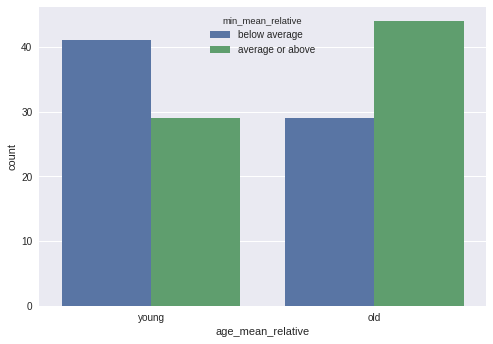

In [0]:
# put your code here

sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative', data = wnba)
#os dados rejeitam a hipótese 
result = 'rejection'


## 1.4 Comparing Histograms

Contrary to what our hypothesis predicted, the grouped bar plot we built showed that among old players the "average or above" category is the most numerous. Among young players we saw an opposite pattern: there are more players who played below the average number of minutes.

A shortcoming of our analysis so far is that the **min_mean_relative** variable doesn't show much granularity. We can see that more **old players** belong to the **"average or above"** category than to **"below average"**, but we can't tell, for instance, whether **old players** generally play much more than the average. For all we know, they could have all played exactly 497 minutes (which is the average).

The **min_mean_relative** variable is ordinal, and it was derived from the **MIN** variable, which is measured on a ratio scale. The information provided by the **MIN** variable is much more granular, and we can plot the distribution of this variable instead. Because the **MIN** variable is measured on a ratio scale, we'll need to use histograms instead of bar plots.

The easiest way to **compare two histograms** is to superimpose one on top of the other. We can do that by using the pandas visualization methods we learned in the previous mission:

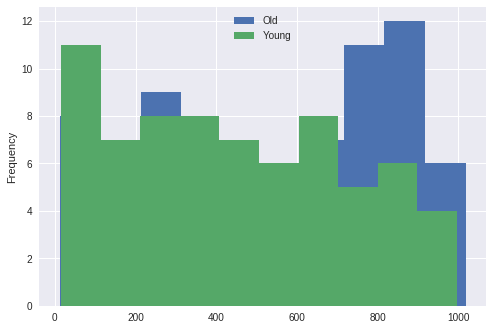

In [4]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)

We can now see that most of the **old players** that belong to the **"average or above"** category play significantly more than average. The main downside of the visualization above is that the histogram for **young players** covers a large part of the other histogram. We can fix this easily by plotting only the shape of the histograms. We can do this using the **histtype** parameter and choose the **'step'** type:



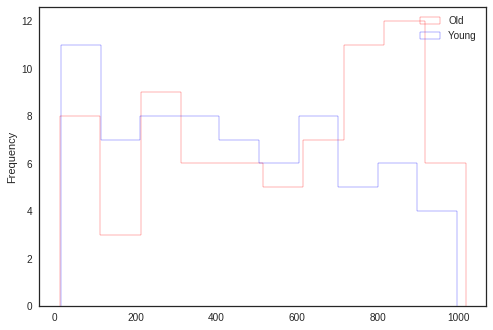

In [7]:
sns.set_style("white")
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True,color="red")
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True,color="blue")

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Looking on our graph above, it's not easy to visualize where the average number of minutes is. Using the [plt.axvline()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html) function, add a vertical line to demarcate the average point:
  - The vertical line should be at point 497 on the x-axis.
  - Use the label parameter of **plt.axvline()** to label it **'Average'**. Display the label by running **plt.legend()**.

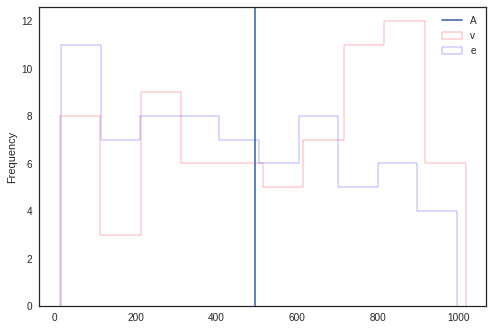

In [13]:
# put your code here
import matplotlib.pyplot as plt
sns.set_style("white")
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True,color="red")
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True,color="blue")
plt.axvline(497)
plt.legend("Average")

## 1.5 Kernel Density Estimate Plots


The step-type histograms we built made it possible to see clearly both distributions. The graph looked a bit overcrowded though, and the legend was not ideally positioned.

<img width="500" src="https://drive.google.com/uc?export=view&id=1Oogmu0kyhTgtK-N1zqsdzYGisTM2D6bE">

If we added more histograms to the graph above, it would become highly unreadable, and it'd be difficult to see any clear patterns. One solution to this problem is to smooth out the shape of the histograms to make them look less dense on the graph. This is how a single histogram would look smoothed out:


<img width="500" src="https://drive.google.com/uc?export=view&id=1us30ptyKArBL7GvemVRzYvBlGOD3KuMR">

We can smooth out our two histograms above for old and young players using the [Series.plot.kde()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.kde.html) function:


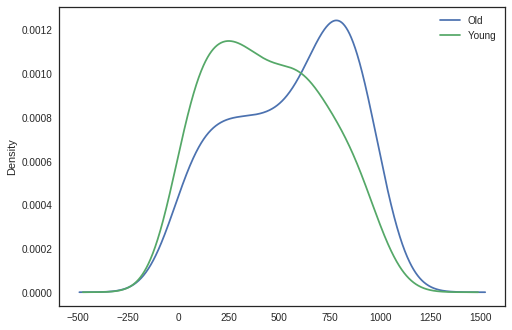

In [14]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)

Each of the smoothed histograms above is called a **kernel density estimate** plot or, shorter, **kernel density plot**. Unlike histograms, **kernel density** plots display densities on the y-axis instead of frequencies. The density values are actually probability values — which we'll be able to understand more about after the probability courses. All you need to know for now is that we can use kernel density plots to get a much clear picture about the shape of a distribution.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Reproduce the kernel density plots above, and add a vertical line to demarcate the average point.
  - The vertical line should be at point 497 on the x-axis.
  - Label the vertical line **'Average'** and make sure the label is displayed in the legend.
- Can we still see that most of the old players that belong to the **"average or above"** category play significantly more than average? If so, is the pattern more obvious (faster to observe) than in the case of the step-type histograms?

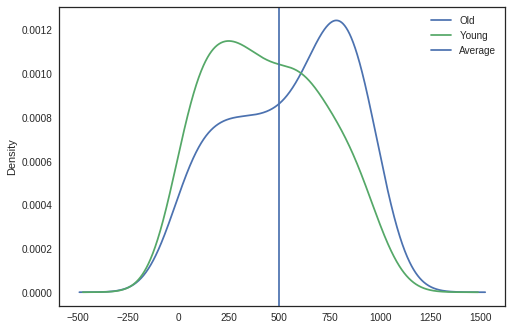

In [18]:
# put your code here
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(497,label = 'Average')
plt.legend()

## 1.6 Drawbacks of Kernel Density Plots

As data scientists, we'll often need to compare more than two distributions. In fact, previously in this mission we compared five distributions on a grouped bar plot:


<img width="400" src="https://drive.google.com/uc?export=view&id=1nSTEDf8EAAE8fQSqxs5dwrlqoU7PF9Gx">

Grouped bar plots are ideal for variables measured on nominal and ordinal scales. For variables measured on a ratio or interval scale, we learned that kernel density plots are a good solution when we have many distributions to compare. However, kernel density plots tend to become unreadable as we reach five distributions or more.

Let's say we're interested in analyzing the distribution of player height as a function of player position. In other words, we want to figure out, for instance, whether centers are generally taller than forwards, whether forwards are generally shorter than guards, and so on. In the code below, we'll segment the data set by player position, and for each segment we'll generate a kernel density plot for the distribution of the **Height** variable:

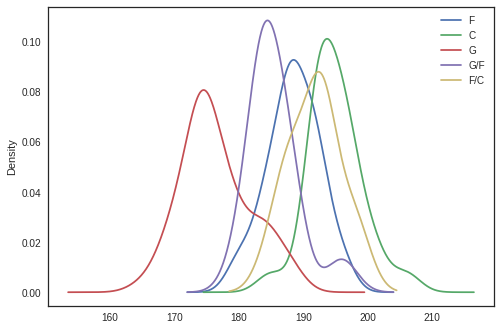

In [19]:
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)


If we look very closely, we can see a couple of clear patterns: the shortest players are generally guards, the tallest players are generally centers, mid-height players are generally forwards or play in a combined position, etc.

Having to look very closely to a graph to identify obvious patterns is far from ideal. If there's any pattern, we want to see it immediately. To overcome this problem, we can use other kinds of graphs, which present the same information in a more readable way. For the rest of this mission, we'll explore two such alternatives.


## 1.7 Strip Plots

This is one alternative we can use to visualize the distribution of **heights** as a function of **player** position:


<img width="400" src="https://drive.google.com/uc?export=view&id=1aQYZGHJg1IDb0C5dUxaSE1coWb3ZI6Dp">


The **Pos** variable is represented on the x-axis, while **Height** is on the y-axis. Each of the five vertical lines made of distinctly colored bullets represents a distribution. These are the logical steps we'd take to build a plot like the one above:

- Segment the data set by player position.
- For every segment:
    - List all the values in the **Height** variable.
    - For every value in that list, draw a bullet point on a graph. The x-coordinate of the bullet point is given by the player position, and the y-coordinate by the player's height.
    
    
<img width="500" src="https://drive.google.com/uc?export=view&id=1Cp_Pd3uSY-9nE7mPw9oGz788ZPsrMUpJ">


Because we segment by player position, for every segment the player position values will be identical for every player while their heights will vary more or less. Because of the segmentation, the player position is also guaranteed to be different from segment to segment. After drawing all the bullet points for all the segments, we'll inevitably end up with five narrow vertical strips, one above each unique value on the x-axis. Because of this, each of the five plots is called a **strip plot**.

To generate the first graph above with five strip plots, we can use the [sns.stripplot()](https://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function from the seaborn module. We place the **Pos** variable on the x-axis and **Height** on the y-axis:





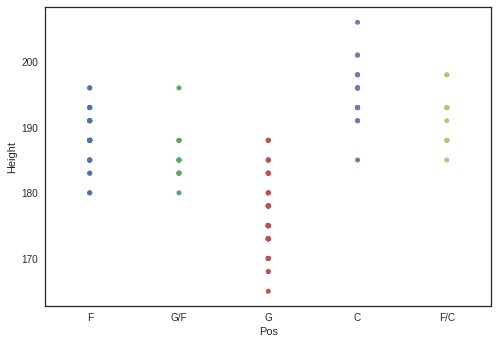

In [20]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba)

Patterns are now immediately visible. We can see on the graph that the **shortest players are guards** — in fact, all players under 180 cm are guards. The **tallest players are centers** — this is the only category with players above 2 meters. Among combined positions, we can see that **F/C has slightly taller representatives** — most likely because it requires center qualities (and we've seen that the tallest players are generally centers).

A **big downside** of strip plots is that the bullet **points overlap**. We can **fix** this by adding a bit of **jitter** to each distribution. We can do this by setting the jitter parameter to **True:**

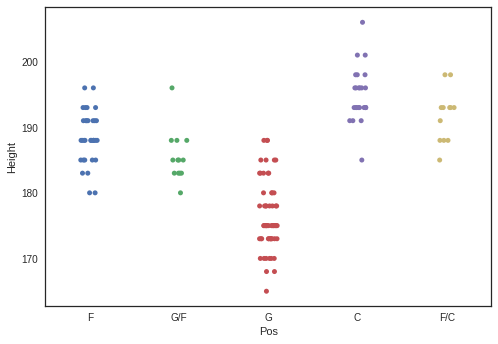

In [21]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba, jitter = True)

On a side note, you might have noticed that strip plots are similar to the scatter plots we learned about in the visualization courses. **In fact, strip plots are actually scatter plots.** When one of the variables is nominal or ordinal, a scatter plot will generally take the form of a series of narrow strips (the number of narrow strips will be the same as the number of unique values in the nominal or ordinal variable).

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Using strip plots, examine the distribution of player **weight** (not height) as a function of player **position**. The graph should have the following properties:
  - The **Pos** variable in on the x-axis and the **Weight** variable on the y-axis.
  - Each **strip** plot has **jitter** added to it. The amount of jitter to apply is the one specific to **jitter = True.**
- Do you see any similarity with the distributions of the **Height** variable? If so, how could this be explained?

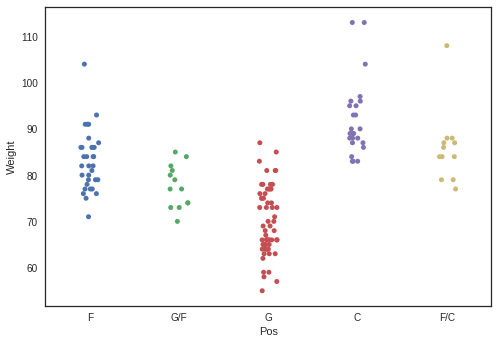

In [23]:
# put your code here
sns.stripplot(x = 'Pos', y = 'Weight', data = wnba, jitter = True)
#Poderia ser explicado com a seguinte razão: Os jogadores mais altos também irão possuir maior peso :)

## 1.8 Box plots

Besides strip plots, there's another kind of graph we can use to display many distributions at once and make sure everything is still readable. Below, we use this kind of graph to plot again the distribution of player height as a function of player position:


<img width="400" src="https://drive.google.com/uc?export=view&id=1YM9kJ-0f8eMvYEvI1C11TpvwQlqSuyRa">

Each individual plot above shows a distribution. Let's isolate the height distribution of guards and understand it by comparing it with a histogram showing the same distribution:

<img width="800" src="https://drive.google.com/uc?export=view&id=1ubAeLqYPthw2jJpN_ApMc30qM1BjSXpN">

In a nutshell, the graph on the right shows the range of the distribution and its three quartiles (the 25th, the 50th and the 75th percentile). This allows us to get a good visual intuition about the proportion of values that fall under a certain quartile, between any two quartiles, or between a quartile and the minimum or the maximum value in the distribution:


<img width="800" src="https://drive.google.com/uc?export=view&id=1Y0H3DLjHVbZOZSzOq8htlinzCxEAQW_R">


The two lines extending upwards and downwards out of the box in the middle look a bit like two whiskers, reason for which we call this plot a **box-and-whisker** plot, or, more convenient, just **box plot.**

We can generate the five box plots above using the [sns.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function. On the x-axis we want the **Pos** variable, and on the y-axis the **Height** variable.



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


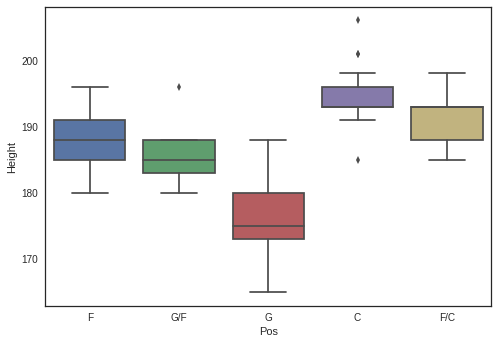

In [24]:
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)

You might wonder what is the meaning of those few dots for the box plots of centers and guards/forwards (G/F), and **why some box plots seem to lack some of the quartiles**. We'll discuss this in the next screen. Now, let's practice generating box plots.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Using **sns.boxplot()**, generate a series of box plots to examine the distribution of player weight as a function of player position. Place the **Pos** variable on the x-axis and the **Weight** variable on the y-axis.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


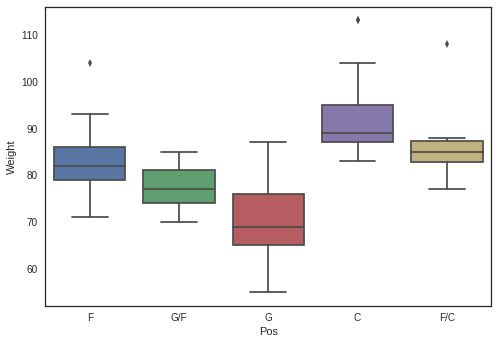

In [26]:
# put your code here
sns.boxplot(x = 'Pos', y = 'Weight', data = wnba)

## 1.9 Outliers

The few dots we see for the box plots of centers and guards/forwards (G/F) represent values in the distribution that are much larger or much lower than the rest of the values. A value that is much lower or much larger than the rest of the values in a distribution is called an **outlier.**

<img width="400" src="https://drive.google.com/uc?export=view&id=1WoZ6rZWu8bIFhJaPwQ5mDvoo2pU0dzLa">


A value is an **outlier** if:

- It's larger than the upper quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).
- It's lower than the lower quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).

<img width="600" src="https://drive.google.com/uc?export=view&id=1NminuWMq8htgOFD5TeAyiLFhXdCtHQjJ">

Probably this is not yet crystal clear, so let's walk through an example. Let's consider the box plot for centers:

<img width="800" src="https://drive.google.com/uc?export=view&id=1krahzq8cce3FQmzXVekQM0UumStTIq8l">


From the output of **wnba[wnba['Pos'] == 'C']['Height'].describe()**, we can see that the upper quartile (the 75th percentile) is 196 and the lower quartile (the 25th percentile) is 193. Hence, the interquartile range is 3.


$$
\text{interquartile range} = \text{upper quartile} - \text{lower quartil}
$$


Every value that is $3 \times 1.5$  bigger than the upper quartile is considered an outlier. $3 \times 1.5 = 4.5$, and the upper quartile is 196. This means that any value greater than $196 + 4.5 = 200.5$  is considered an outlier.

Similarly, every value that is  $3 \times 1.5$ lower that the lower quartile is an outlier. $3 \times 1.5 = 4.5$, and the upper quartile is 193. This means that any value less than $193 - 4.5 = 188.5$ is an outlier.


<img width="500" src="https://drive.google.com/uc?export=view&id=18HtBhxsTPDtuhq4W0YoXfCs8Rx1gz-yQ">


This formal definition of an outlier is arbitrary, and it could be changed if we wanted to. For any given distribution, the upper and lower quartiles, and the interquartile range remain constant. However, the 1.5 factor can vary. If the factor is increased, then the range outside which values are considered outliers increases as well. If the factor is decreased, the range outside which values are considered outlier decreases as well.

When we generate boxplots, we can increase or decrease this factor by using the **whis** parameter of the **sns.boxplot()** function. This is the same height distribution for centers without any outliers:




/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


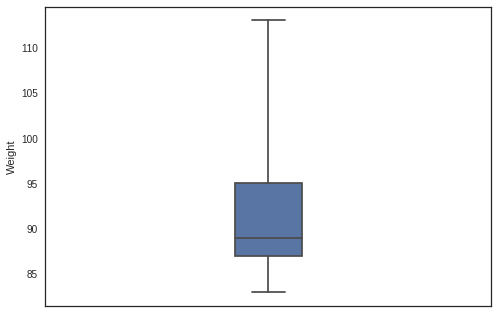

In [88]:
sns.boxplot(wnba[wnba['Pos'] == 'C']['Weight'], whis = 4,
              orient = 'vertical', width = .15,)

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Consider the quartiles of the **Games Played** variable:

```python
>> wnba['Games Played'].describe()
count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64
```

- Find the interquartile range, and assign the result to a variable named **iqr**.
- Using a factor of 1.5, calculate the lower and upper bound outside which values are considered outliers.
    - Assign the value of the lower bound to a variable named **lower_bound**.
    - Assign the upper bound to a variable named **upper_bound.**
- Find how many values in the distribution are outliers.
    - Assign the number of outliers below the lower bound to a variable named **outliers_low.**
    - Assign the number of outliers below the upper bound to a variable named **outliers_high.**
- Plot a boxplot to check whether your answers are sensible.




/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


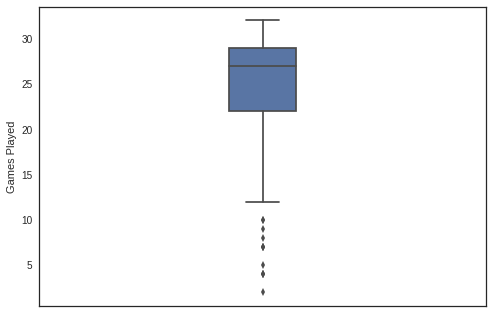

In [104]:
# put your code here
dados = wnba['Games Played'].describe()
lower_bound = dados[4]
upper_bound = dados[6]
interquartile_range=(upper_bound- lower_bound)
#wnba[wnba['Games Played'] <11.5]
#wnba[wnba['Games Played'] >32.5]
outliers_low = 12
outliers_high = 0
sns.boxplot(wnba['Games Played'], 
              orient = 'vertical', width = .15,)

# 1.10 Next Steps

In this mission, we learned how to compare frequency distributions using graphs. Grouped bar plots are ideal to compare the frequency distributions of nominal or ordinal variables. For variables measured on an interval or ratio scale, we can use step-type histograms, kernel density plots, or, for better readability, strip plots or box plots.

<img width="400" src="https://drive.google.com/uc?export=view&id=1J7n1gvx8sQpJ-WNZF5do8VPQk_vf2ORb">


We've come a long way in this course from learning about sampling to visualizing multiple frequency distributions. We've made great progress so far and completed the workflow we set out to do in the first mission.


<img width="600" src="https://drive.google.com/uc?export=view&id=1XQ_nPiVB1pMBaS0ikBE6IPeifOYbDG11">
